In [1]:
import pandas as pd
import matplotlib.pyplot as plt

A partir da exploração define que irei usar os seguintes arquivos como dataset
* arquivo de teste = Test3classes.csv
* arquivo de treino = Train3Classes.csv

Escolhi esses arquivos para termos um problema multiclasse.
* 0 = sentimento NEGATIVO
* 1 = sentimento POSITIVO
* 2 = sentimento NEUTRO


In [2]:
test  = pd.read_csv('../portuguese-tweets-for-sentiment-analysis/testdatasets/Test3classes.csv',delimiter=';')
train = pd.read_csv('../portuguese-tweets-for-sentiment-analysis/trainingdatasets/Train3Classes.csv',delimiter=';')

In [3]:
test.sample(5)

,id,tweet_text,tweet_date,sentiment,query_used
4634,1024794287186370561,Noruegueses estão insatisfeitos com carros elé...,Wed Aug 01 23:09:32 +0000 2018,2,exame
4916,1025077840369332224,Greve dos caminhoneiros traz prejuízo inespera...,Thu Aug 02 17:56:16 +0000 2018,2,exame
1965,1030498743379021827,@gayvane mas esse ano tem maneva e já perdi o ...,Fri Aug 17 16:57:00 +0000 2018,0,:(
83,1029538062945185795,"@matheusmathiass off, prefiro meu penal, civil...",Wed Aug 15 01:19:36 +0000 2018,1,:)
3551,1022138871608483841,Concurso premia melhores fotos de drone https:...,Wed Jul 25 15:17:52 +0000 2018,2,veja


In [4]:
train.sample(5)

,id,tweet_text,tweet_date,sentiment,query_used
61774,1046691755003965440,não entendem o medo que tenho que o james arth...,Mon Oct 01 09:22:15 +0000 2018,0,:(
39431,1049249215539556353,Quando eu lembro que agora só tem pomeras no d...,Mon Oct 08 10:44:41 +0000 2018,0,:(
10388,1048414188069113856,@emtsuka @euthunderstorms Na minha tbm :),Sat Oct 06 03:26:35 +0000 2018,1,:)
99820,1030566348273971200,Analista Desenvolvedor Java - Pleno - São Paul...,Fri Aug 17 21:25:39 +0000 2018,2,#oportunidade
4938,1049268383886262272,#Valladolid #Hyperlapse by novaer_es #Bravisim...,Mon Oct 08 12:00:51 +0000 2018,1,:)


In [5]:
test.drop_duplicates(subset='id', keep = False, inplace = True)
train.drop_duplicates(subset='id', keep = False, inplace = True)

In [6]:
test.drop(columns = ["id" ,"tweet_date"], axis = 1 , inplace = True)
train.drop(columns = ["id" , "tweet_date"], axis = 1 , inplace = True)

In [7]:
dataset = pd.concat([test,train], ignore_index=True )

In [8]:
print(dataset.sentiment.value_counts())

1    35000
0    34999
2    34972
Name: sentiment, dtype: int64


### Cria a primeira WordCloud

In [9]:
# fixa a imagem no notebook
%matplotlib inline


tweets_positivos = dataset.query('sentiment == 1')
tweets_negativos = dataset.query('sentiment == 0')
tweets_neutros   = dataset.query('sentiment == 2')

#### WordCloud dos tweets positivos

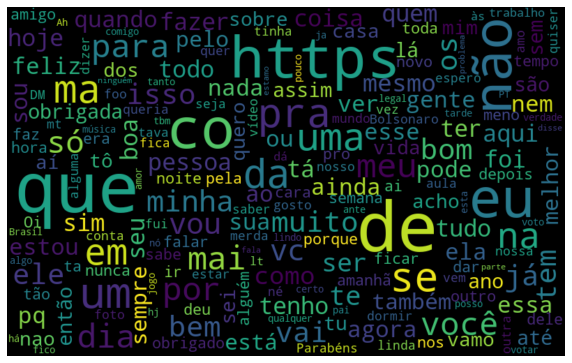

In [10]:
from wordcloud import WordCloud

text = [str(text) for text in tweets_positivos.tweet_text]

# um texto enorme, com todas as resenhas
all_ = ' '.join(text)
cloud_words = WordCloud(
    width = 800 , height = 500 , 
           max_font_size = 100,
                       collocations = False).generate(all_)


plt.figure(figsize = (10,8))
plt.imshow(cloud_words , interpolation = 'bilinear')
plt.axis("off")
plt.show()

#### WordCloud dos tweets negativos

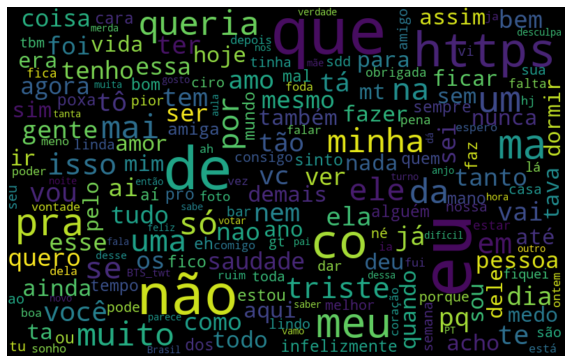

In [11]:
from wordcloud import WordCloud

text = [str(text) for text in tweets_negativos.tweet_text]

all_ = ''
all_ = ' '.join(text)
cloud_words = WordCloud(
    width = 800 , height = 500 , 
           max_font_size = 100,
                       collocations = False).generate(all_)


plt.figure(figsize = (10,8))
plt.imshow(cloud_words , interpolation = 'bilinear')
plt.axis("off")
plt.show()

#### WordCloud dos tweets neutros

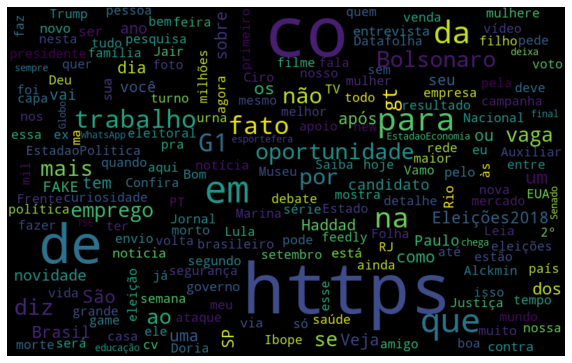

In [12]:
from wordcloud import WordCloud

text = [str(text) for text in tweets_neutros.tweet_text]

all_ = ''
all_ = ' '.join(text)
cloud_words = WordCloud(
    width = 800 , height = 500 , 
           max_font_size = 100,
                       collocations = False).generate(all_)


plt.figure(figsize = (10,8))
plt.imshow(cloud_words , interpolation = 'bilinear')
plt.axis("off")
plt.show()

#### A partir do WordCloud é possível notar que existem muitas palavras que não remetem diretamente ao sentimento associado

#### Iremos então tokenizar e analizar quais palavras mais aparecem

In [13]:
import nltk
from nltk import tokenize

text = [str(text) for text in dataset.tweet_text]
all_ = ''
all_ = ' '.join(text)

tokenizador = tokenize.WhitespaceTokenizer()
tokens = tokenizador.tokenize(all_)

frequencia = nltk.FreqDist(tokens)

import pandas as pd
df_frequencia = pd.DataFrame({
    "Palavra" : list(frequencia.keys()),
    "Frequência" : list(frequencia.values())
})

## mostra as palavras de maior frequencia
most_frequency = df_frequencia.nlargest(
    columns = "Frequência" , 
    n = 15)

most_frequency

,Palavra,Frequência
71,de,42946
9,que,29166
1073,:(,28680
43,e,28489
4,:),24144
29,a,23990
118,o,22296
68,eu,16480
88,é,15445
66,do,15129


#### É notavel que as palavras mais frequentes sao palavras que nao agregam a classificacao e são irrelevantes

#### Iremos então eliminar as palavras irrelevantes ( stop words )

#### Iremos antes ... retirar os acentos das palavras 

In [14]:
import unidecode

# tudo lowercase
for index, row in dataset.iterrows():
    dataset.at[index,'tweet_text'] = unidecode.unidecode(row['tweet_text'])

In [15]:
# fazemos o download das stop words mais comuns do português
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/pedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words = nltk.corpus.stopwords.words("portuguese")
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

#### Iremos além de eliminas as stop words iremos eliminar as pontuações comuns da lingua portuguesa

In [17]:
import re


for index, row in dataset.iterrows():
    # coloca todos os tweets em lowcase
    dataset.at[index,'tweet_text'] = row['tweet_text'].lower()
    
# elimina as stop words
for index, row in dataset.iterrows():
    # retorna apenas as palavras
    # elimina aos pnts de sinalizacao
    words = re.findall(r"[\w']+", row['tweet_text'])
    temp = [ws for ws in words if ws not in stop_words]
    dataset.at[index,'tweet_text'] = ' '.join(temp)

In [18]:
# atualiza a variavel

text = [text for text in dataset.tweet_text]
all_ = ' '.join(text)

In [20]:
tokenizador = tokenize.WhitespaceTokenizer()
tokens = tokenizador.tokenize(all_)

frequencia = nltk.FreqDist(tokens)

import pandas as pd
df_frequencia = pd.DataFrame({
    "Palavra" : list(frequencia.keys()),
    "Frequência" : list(frequencia.values())
})

## mostra as palavras de maior frequencia
most_frequency = df_frequencia.nlargest(
    columns = "Frequência" , 
    n = 15)

most_frequency

,Palavra,Frequência
14,t,57232
15,co,57160
13,https,57125
18,nao,19720
315,pra,7915
105,so,5925
211,to,5498
208,voce,4593
186,d,4510
76,ja,4486


#### Ainda existem words irrelevantes

#### Iremos fazer então a Stemização, que é extrair apenas os radicais das palavras
#### Dessa forma conseguimos evitar as constrações e flexões das palavras

In [21]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/pedro/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [23]:
stemmer = nltk.RSLPStemmer()

for index, row in dataset.iterrows():
    #retorna apenas as palavras - eliminando os pnts de sinalizacao
    words = re.findall(r"[\w']+", row['tweet_text'])
    temp = [stemmer.stem(ws) for ws in words]
    dataset.at[index,'tweet_text'] = ' '.join(temp)

In [24]:
# atualiza a variavel

text = [text for text in dataset.tweet_text]
all_ = ' '.join(text)

In [25]:
tokenizador = tokenize.WhitespaceTokenizer()
tokens = tokenizador.tokenize(all_)

frequencia = nltk.FreqDist(tokens)

import pandas as pd
df_frequencia = pd.DataFrame({
    "Palavra" : list(frequencia.keys()),
    "Frequência" : list(frequencia.values())
})

## mostra as palavras de maior frequencia
most_frequency = df_frequencia.nlargest(
    columns = "Frequência" , 
    n = 15)

most_frequency

,Palavra,Frequência
14,t,57232
15,co,57223
13,http,57133
18,nao,19736
299,pra,8056
65,so,6418
346,quer,5908
203,to,5498
165,voc,5456
266,dia,5331
